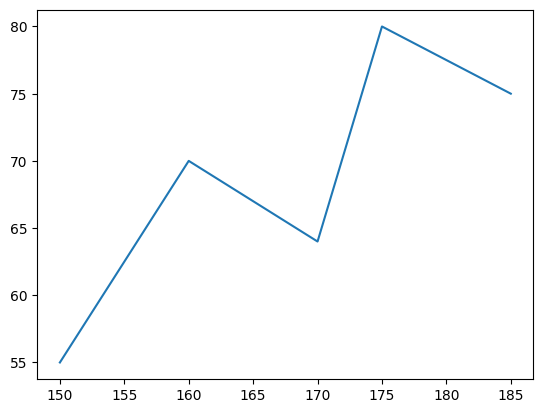

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160,170,175,185]
y = [55,70,64, 80, 75]
plt.plot(x,y)

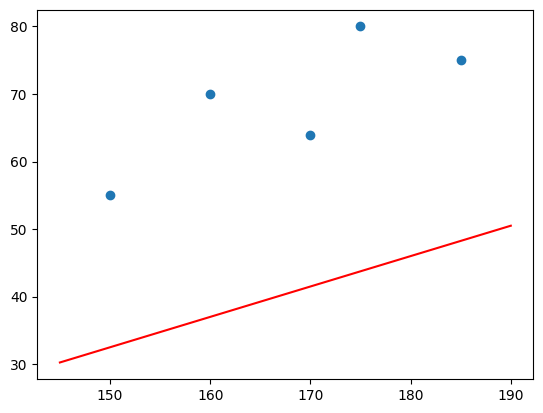

In [20]:
a = 0.45
b = -35
x_plot = np.linspace(145,190,100)
y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,"r")

optimal a = [0.56262626]
optimal b = [-25.75757576]


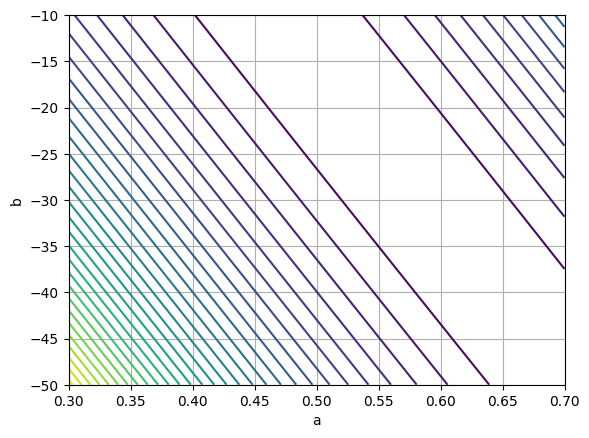

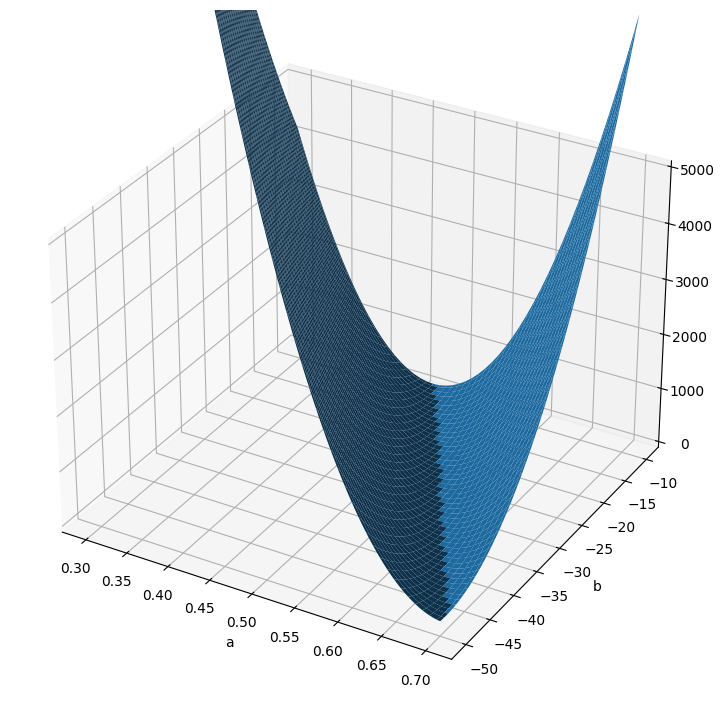

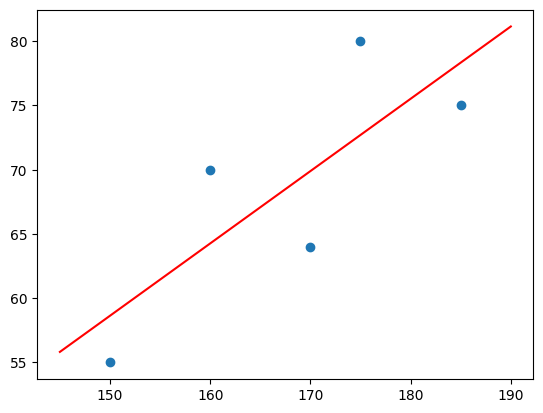

In [21]:
a = 0.5 + np.linspace(-0.2 , 0.2, 100)
b = -30 + np.linspace(-20, 20 , 100)

A, B = np.meshgrid(a,b)

# print(A)
# print(B)

L = np.zeros_like(A)
zip(x,y)

for xi, yi in zip(x,y):
    L += (yi - (A*xi+B))**2

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel("a")
plt.ylabel("b")
plt.grid()

plt.figure(figsize=[10,9])
ax = plt.axes(projection="3d")
ax.plot_surface(A,B,L)
plt.xlabel("a")
plt.ylabel("b")
ax.set_zlim([0,5000])

a_opt = A[L == np.min(L)]
b_opt = B[L == np.min(L)]

print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

plt.figure()
y_plot = a_opt * x_plot + b_opt
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,"r")

tensor(-47545.)
tensor(-282.)
tensor(0.4975) tensor(-34.9997)


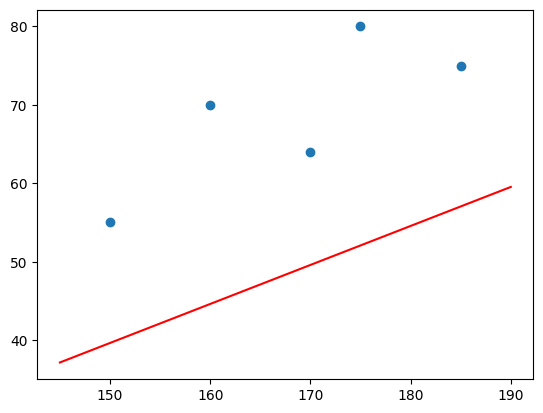

In [23]:
import torch
a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

L = 0
for xi, yi in zip(x,y):
    L += (yi - (a * xi + b))**2

L.backward()

print(a.grad)
print(b.grad)

LR = 1e-6
a = a.detach() - LR*a.grad
b = b.detach() - LR*b.grad

print(a,b)

plt.figure()
y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,"r")

tensor(-621.2384)
tensor(-4.1292)
tensor(0.6160) tensor(-34.9990)


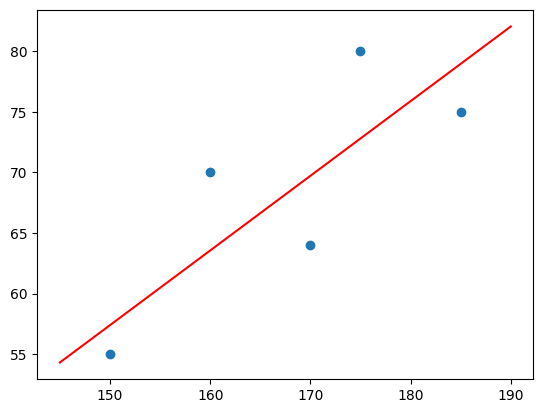

In [36]:
a.requires_grad=True
b.requires_grad=True

L = 0
for xi, yi in zip(x,y):
    L += (yi - (a * xi + b))**2

L.backward()

print(a.grad)
print(b.grad)

LR = 1e-6
a = a.detach() - LR*a.grad
b = b.detach() - LR*b.grad

print(a,b)

plt.figure()
y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,"r")

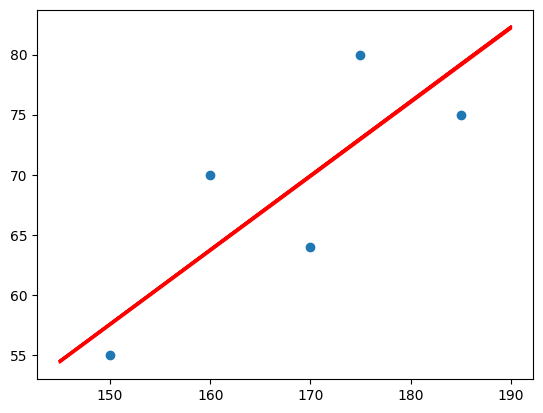

In [37]:
EPOCH = 10    
LR = 1e-6
plt.plot(x, y, "o")

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L = 0
    for xi, yi in zip(x,y):
        L += (yi - (a * xi + b))**2

    L.backward()

    a = a.detach() - LR*a.grad
    b = b.detach() - LR*b.grad

    y_plot = a * x_plot + b
    plt.plot(x_plot,y_plot,"r")

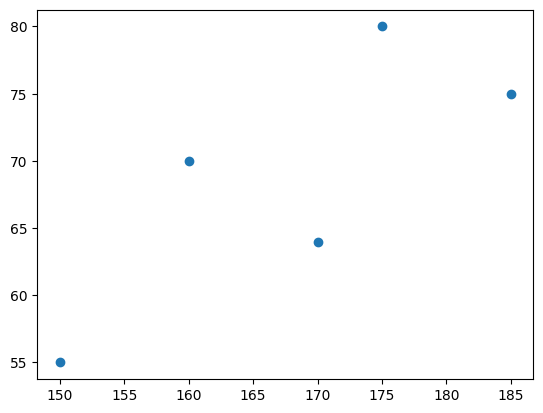

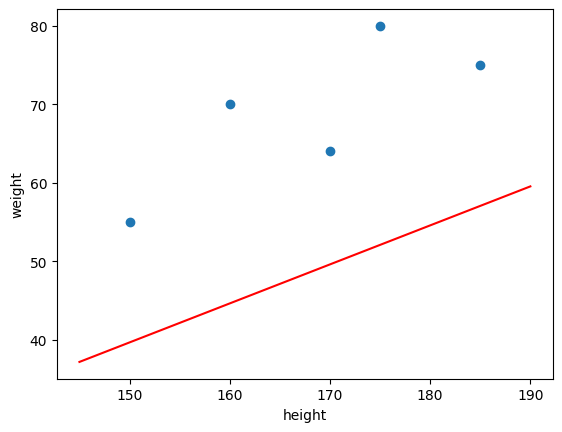

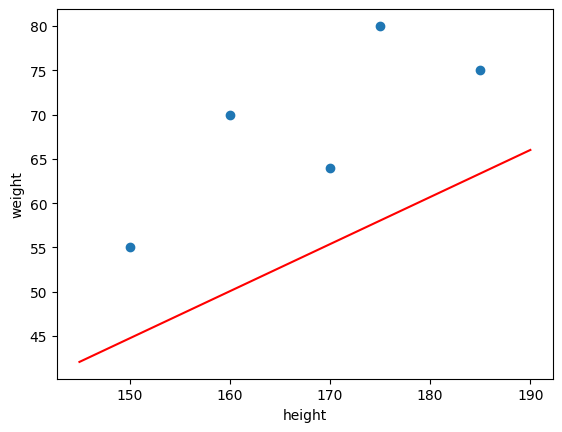

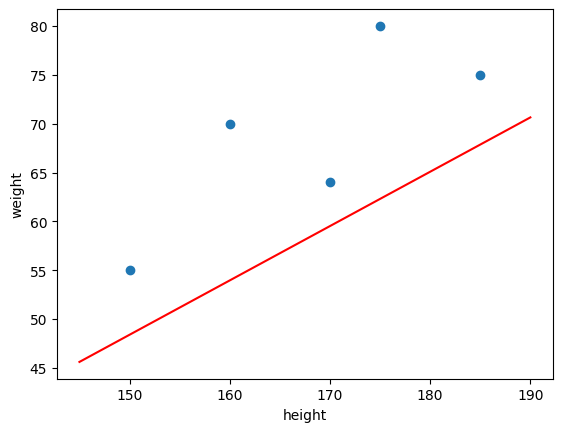

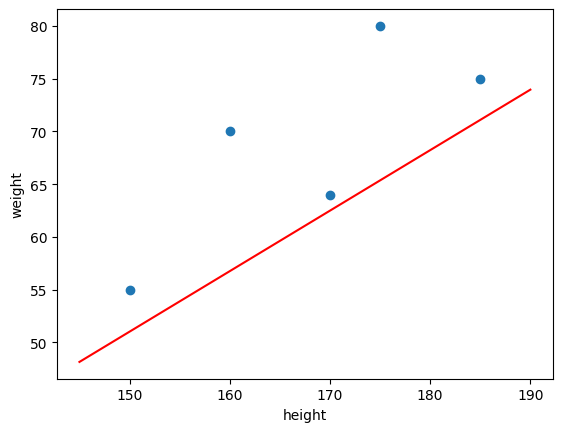

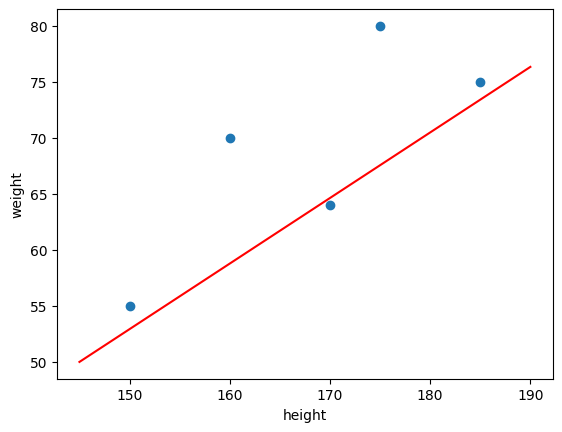

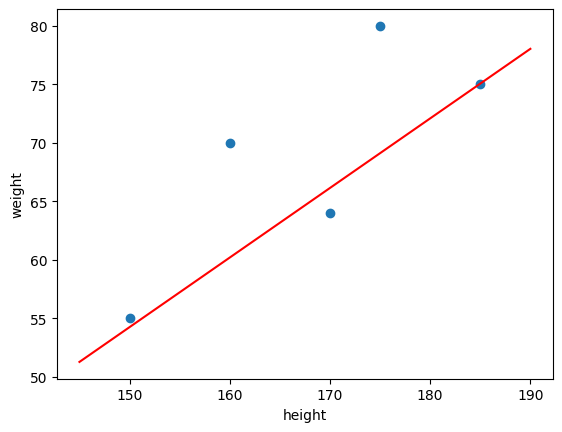

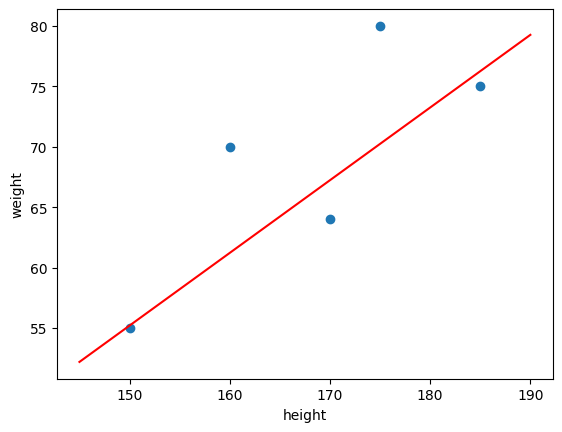

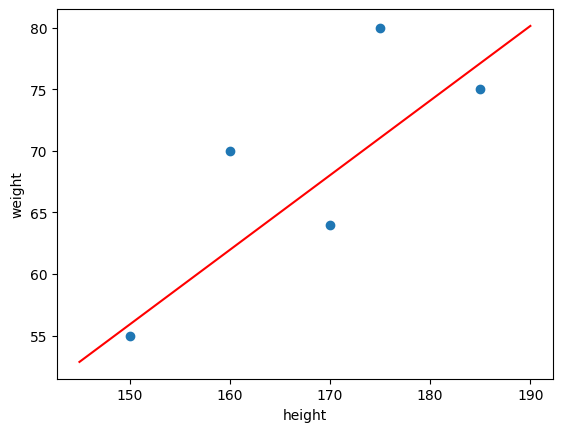

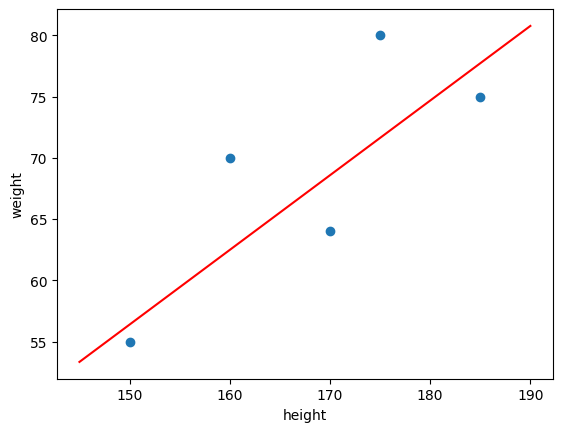

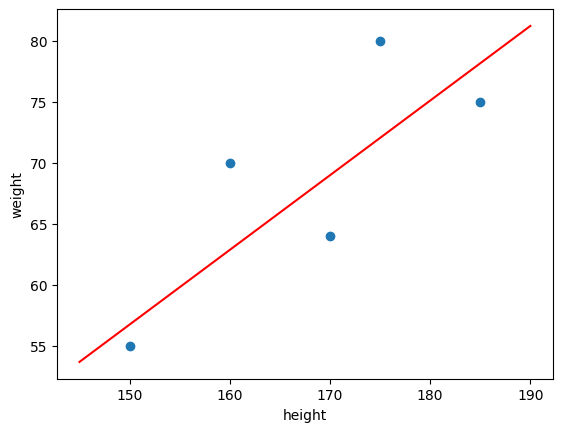

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import torch


x = [150, 160,170,175,185]
y = [55,70,64, 80, 75]

x_plot = np.linspace(145,190,100)
EPOCH = 10    
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L = 0
    for xi, yi in zip(x,y):
        L += (yi - (a * xi + b))**2

    L.backward()

    a = a.detach() - LR*a.grad
    b = b.detach() - LR*b.grad

    y_plot = a * x_plot + b

    plt.figure()
    plt.plot(x, y, "o")
    plt.plot(x_plot,y_plot,"r")
    plt.xlabel("height")
    plt.ylabel("weight")

[0.44999998807907104, 0.4975450038909912, 0.5316010117530823, 0.555994987487793, 0.5734681487083435, 0.5859839916229248, 0.5949490070343018, 0.6013705134391785, 0.6059702038764954, 0.6092649102210999, 0.6116248369216919]
[-35.0, -34.999717712402344, -34.999515533447266, -34.99937057495117, -34.999267578125, -34.99919128417969, -34.99913787841797, -34.99909973144531, -34.99907302856445, -34.999053955078125, -34.99903869628906]


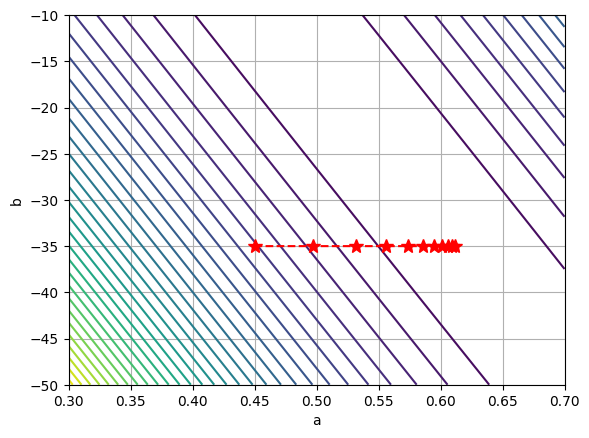

In [41]:
# history - GD
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160,170,175,185]
y = [55,70,64, 80, 75]

x_plot = np.linspace(145,190,100)
EPOCH = 10    
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

a_hist = [a.detach().item()]
b_hist = [b.detach().item()]

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L = 0
    for xi, yi in zip(x,y):
        L += (yi - (a * xi + b))**2

    L.backward()

    a = a.detach() - LR*a.grad
    b = b.detach() - LR*b.grad

    a_hist += [a.item()]
    b_hist += [b.item()]

    y_plot = a * x_plot + b

a = 0.5 + np.linspace(-0.2 , 0.2, 100)
b = -30 + np.linspace(-20, 20 , 100)

A, B = np.meshgrid(a,b)

L = np.zeros_like(A)

for xi, yi in zip(x,y):
    L += (yi - (A*xi+B))**2

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel("a")
plt.ylabel("b")
plt.grid()

plt.plot(a_hist, b_hist, "r*--", markersize=10)
print(a_hist)
print(b_hist)

[0.44999998807907104, 0.45674997568130493, 0.4640098214149475, 0.4738524854183197, 0.48507896065711975, 0.4925752282142639, 0.5009552836418152, 0.510521650314331, 0.5162762999534607, 0.5200954079627991, 0.5236909985542297, 0.5318647623062134, 0.5361584424972534, 0.5388283133506775, 0.5448401570320129, 0.547322154045105, 0.5496925115585327, 0.5527658462524414, 0.5580640435218811, 0.5594677329063416, 0.565450131893158, 0.5664268732070923, 0.567937433719635, 0.572458803653717, 0.5739737153053284, 0.579067587852478, 0.5792572498321533, 0.5831990242004395, 0.5839787721633911, 0.5884597897529602, 0.5889788269996643, 0.5931535959243774, 0.5934614539146423, 0.5935387015342712, 0.5967492461204529, 0.5959168672561646, 0.5958260297775269, 0.5950469970703125, 0.5988500714302063, 0.5989015698432922, 0.6018375158309937, 0.6013414263725281, 0.6047589778900146, 0.6073950529098511, 0.6059473156929016, 0.6056793928146362, 0.6054235696792603, 0.6080256104469299, 0.6071059107780457, 0.6056748628616333, 0.

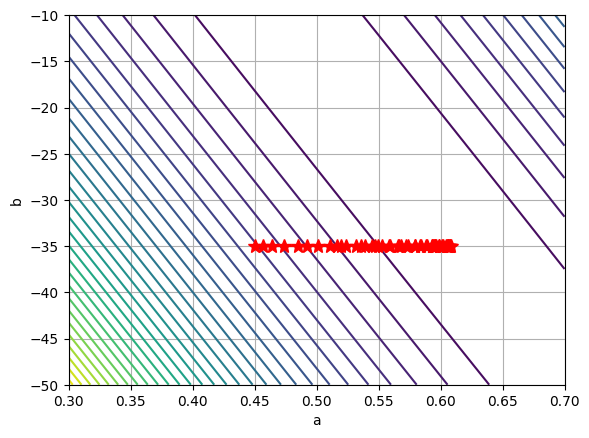

In [46]:
# history - SGD
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x = [150, 160,170,175,185]
y = [55,70,64, 80, 75]

x_plot = np.linspace(145,190,100)
EPOCH = 10    
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

a_hist = [a.detach().item()]
b_hist = [b.detach().item()]

# suffle_idx = [1,2,3,4,5]
# random.shuffle(suffle_idx)
# print(suffle_idx)

for _ in range(EPOCH):
    suffle_idx = list(range(len(x)))
    random.shuffle(suffle_idx)

    for i in suffle_idx:
        a.requires_grad=True
        b.requires_grad=True

        L = (y[i]-(a*x[i]+b))**2

        L.backward()

        a = a.detach() - LR*a.grad
        b = b.detach() - LR*b.grad

        a_hist += [a.item()]
        b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2 , 0.2, 100)
b = -30 + np.linspace(-20, 20 , 100)

A, B = np.meshgrid(a,b)

L = np.zeros_like(A)

for xi, yi in zip(x,y):
    L += (yi - (A*xi+B))**2

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel("a")
plt.ylabel("b")
plt.grid()

plt.plot(a_hist, b_hist, "r*--", markersize=10)
print(a_hist)
print(b_hist)